In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [43]:
df = pd.read_csv(r"C:\Users\sarav\Documents\EDA\datasets\eurusd\eurusd_h4.csv")

In [44]:
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume
0,0,2012-01-02 00:00:00,1.29443,1.29525,1.29220,1.29307,3601,18,0
1,1,2012-01-02 04:00:00,1.29308,1.29464,1.29206,1.29304,4672,13,0
2,2,2012-01-02 08:00:00,1.29303,1.29681,1.29257,1.29452,11304,10,0
3,3,2012-01-02 12:00:00,1.29454,1.29512,1.29224,1.29319,9752,7,0
4,4,2012-01-02 16:00:00,1.29321,1.29413,1.29168,1.29259,6615,5,0
...,...,...,...,...,...,...,...,...,...
15534,15534,2021-12-30 08:00:00,1.13258,1.13268,1.12999,1.13017,6226,0,0
15535,15535,2021-12-30 12:00:00,1.13013,1.13445,1.13003,1.13039,8859,0,0
15536,15536,2021-12-30 16:00:00,1.13039,1.13401,1.12986,1.13150,10259,0,0
15537,15537,2021-12-30 20:00:00,1.13150,1.13303,1.13038,1.13257,3354,0,0


In [45]:
del df['Unnamed: 0']
del df['tick_volume']
del df['spread']

In [46]:
df

,time,open,high,low,close,real_volume
0,2012-01-02 00:00:00,1.29443,1.29525,1.29220,1.29307,0
1,2012-01-02 04:00:00,1.29308,1.29464,1.29206,1.29304,0
2,2012-01-02 08:00:00,1.29303,1.29681,1.29257,1.29452,0
3,2012-01-02 12:00:00,1.29454,1.29512,1.29224,1.29319,0
4,2012-01-02 16:00:00,1.29321,1.29413,1.29168,1.29259,0
...,...,...,...,...,...,...
15534,2021-12-30 08:00:00,1.13258,1.13268,1.12999,1.13017,0
15535,2021-12-30 12:00:00,1.13013,1.13445,1.13003,1.13039,0
15536,2021-12-30 16:00:00,1.13039,1.13401,1.12986,1.13150,0
15537,2021-12-30 20:00:00,1.13150,1.13303,1.13038,1.13257,0


In [47]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [48]:
df.isna().sum()

time            0
open            0
high            0
low             0
close           0
real_volume     0
SMA10           9
SMA20          19
dtype: int64

In [49]:
df = df.dropna()

In [50]:
df = df.reset_index()

In [51]:
del df['index']

In [52]:
df

,time,open,high,low,close,real_volume,SMA10,SMA20
0,2012-01-05 04:00:00,1.29308,1.29322,1.29096,1.29178,0,1.298911,1.297592
1,2012-01-05 08:00:00,1.29180,1.29434,1.28300,1.28319,0,1.296517,1.297099
2,2012-01-05 12:00:00,1.28318,1.28471,1.27837,1.28027,0,1.294035,1.296460
3,2012-01-05 16:00:00,1.28027,1.28144,1.27769,1.27867,0,1.291641,1.295667
4,2012-01-05 20:00:00,1.27858,1.27969,1.27702,1.27904,0,1.289129,1.294960
...,...,...,...,...,...,...,...,...
15515,2021-12-30 08:00:00,1.13258,1.13268,1.12999,1.13017,0,1.131701,1.131851
15516,2021-12-30 12:00:00,1.13013,1.13445,1.13003,1.13039,0,1.131655,1.131794
15517,2021-12-30 16:00:00,1.13039,1.13401,1.12986,1.13150,0,1.131803,1.131826
15518,2021-12-30 20:00:00,1.13150,1.13303,1.13038,1.13257,0,1.132008,1.131896


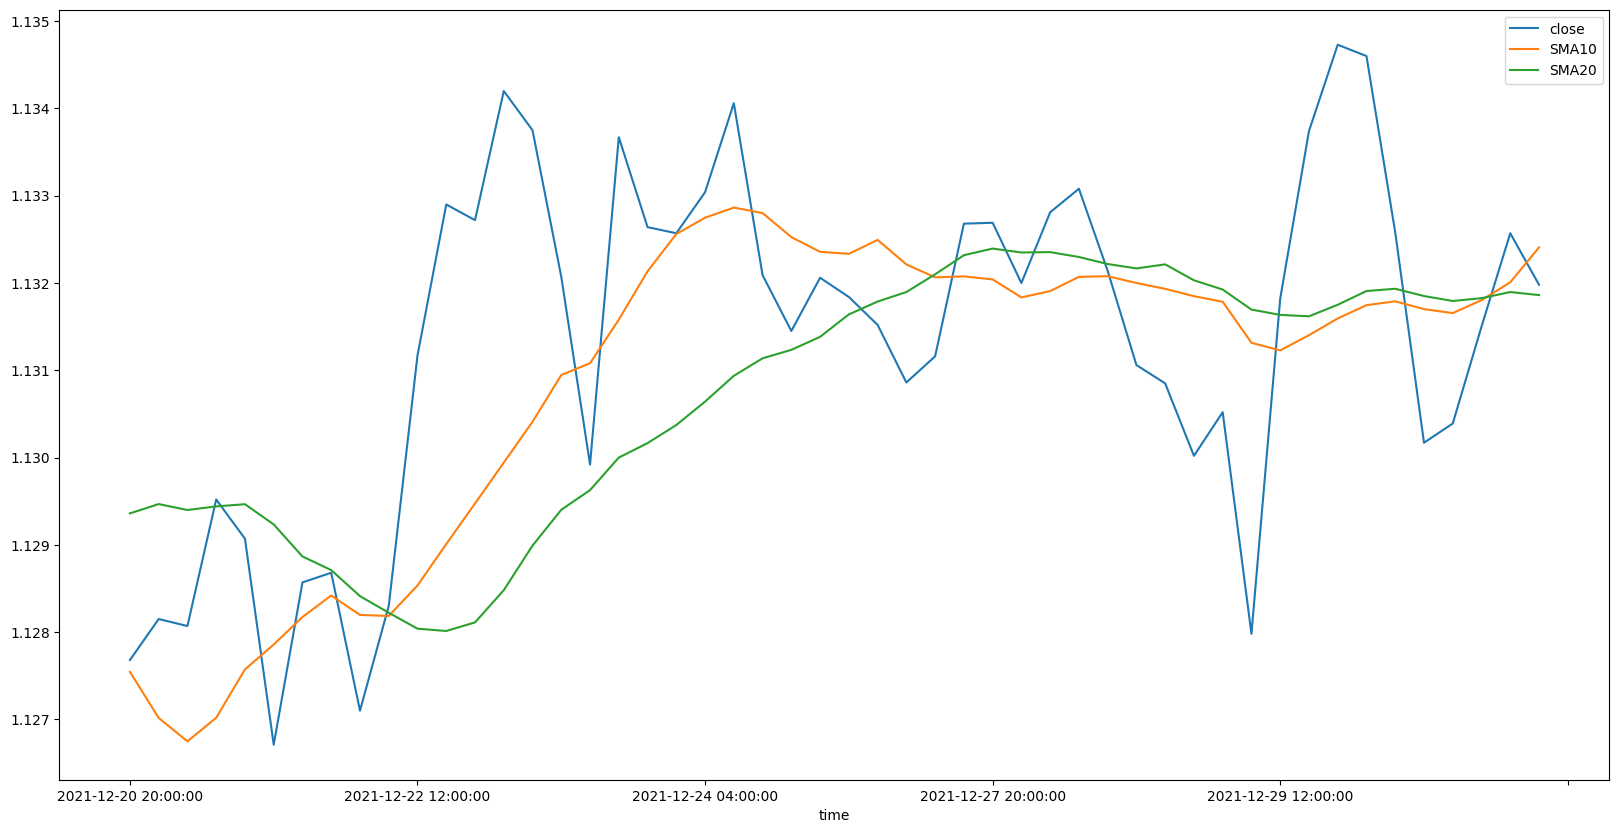

In [53]:
df[['close','SMA10','SMA20','time']].tail(50).plot(figsize=(20,10),x='time')
plt.show()

In [54]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        return np.NaN

df['Signal'] = df.apply(signal,axis=1)

In [55]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        if raw.shift(-1)['Signal'] == 0:
            return 0
        else:
            return 1

df['Signal'] = df.apply(signal,axis=1)

In [56]:
df['Signal'].isna().sum()

0

In [57]:
df['Signal-Filtered'] = df['Signal'][df['Signal'] != df['Signal'].shift()]

In [58]:
df['Signal-Price(BUY)'] = df['close'][df['Signal-Filtered'] == 1]
df['Signal-Price(SELL)'] = df['close'][df['Signal-Filtered'] == 0]

In [59]:
df.tail(50)

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
15470,2021-12-20 20:00:00,1.12842,1.12871,1.12720,1.12768,0,1.127545,1.129360,0,NaN,NaN,NaN
15471,2021-12-21 00:00:00,1.12755,1.12848,1.12731,1.12815,0,1.127017,1.129467,0,NaN,NaN,NaN
15472,2021-12-21 04:00:00,1.12817,1.12870,1.12764,1.12807,0,1.126749,1.129399,0,NaN,NaN,NaN
15473,2021-12-21 08:00:00,1.12806,1.13028,1.12760,1.12952,0,1.127019,1.129440,0,NaN,NaN,NaN
15474,2021-12-21 12:00:00,1.12953,1.13014,1.12760,1.12907,0,1.127573,1.129466,0,NaN,NaN,NaN
15475,2021-12-21 16:00:00,1.12908,1.12921,1.12609,1.12671,0,1.127858,1.129234,0,NaN,NaN,NaN
15476,2021-12-21 20:00:00,1.12672,1.12860,1.12640,1.12857,0,1.128173,1.128866,0,NaN,NaN,NaN
15477,2021-12-22 00:00:00,1.12872,1.12941,1.12715,1.12868,0,1.128420,1.128710,0,NaN,NaN,NaN
15478,2021-12-22 04:00:00,1.12868,1.12873,1.12683,1.12710,0,1.128197,1.128413,0,NaN,NaN,NaN
15479,2021-12-22 08:00:00,1.12710,1.12855,1.12645,1.12830,0,1.128185,1.128222,0,NaN,NaN,NaN


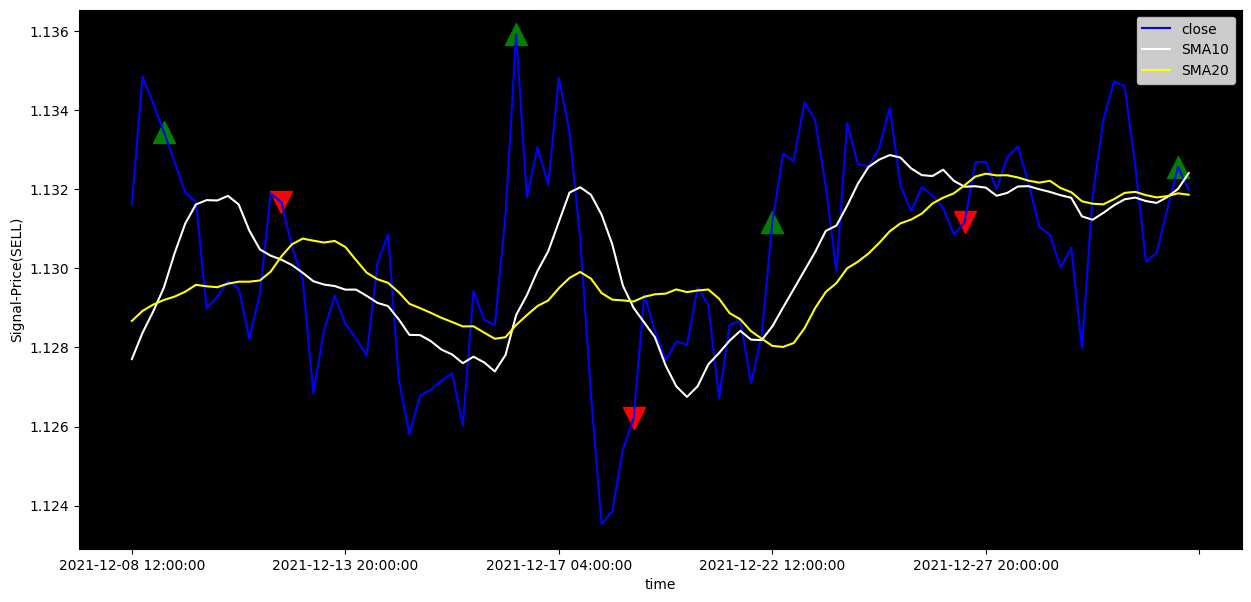

In [60]:
ax = df[['close','SMA10','SMA20','time']].tail(100).plot(x='time',legend=True,figsize=(15, 7),color=['blue','white','yellow'])
df[['time','Signal-Price(BUY)']].tail(100).plot(x='time',y='Signal-Price(BUY)',kind='scatter',ax=ax,marker='^',secondary_y=True,color='green',legend='True',s=250)
df[['time','Signal-Price(SELL)']].tail(100).plot(x='time',y='Signal-Price(SELL)',kind='scatter',ax=ax,marker='v',secondary_y=True,color='red',legend='True',s=250)
ax.set_facecolor('black')
plt.show()

In [61]:
df.tail(50)

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
15470,2021-12-20 20:00:00,1.12842,1.12871,1.12720,1.12768,0,1.127545,1.129360,0,NaN,NaN,NaN
15471,2021-12-21 00:00:00,1.12755,1.12848,1.12731,1.12815,0,1.127017,1.129467,0,NaN,NaN,NaN
15472,2021-12-21 04:00:00,1.12817,1.12870,1.12764,1.12807,0,1.126749,1.129399,0,NaN,NaN,NaN
15473,2021-12-21 08:00:00,1.12806,1.13028,1.12760,1.12952,0,1.127019,1.129440,0,NaN,NaN,NaN
15474,2021-12-21 12:00:00,1.12953,1.13014,1.12760,1.12907,0,1.127573,1.129466,0,NaN,NaN,NaN
15475,2021-12-21 16:00:00,1.12908,1.12921,1.12609,1.12671,0,1.127858,1.129234,0,NaN,NaN,NaN
15476,2021-12-21 20:00:00,1.12672,1.12860,1.12640,1.12857,0,1.128173,1.128866,0,NaN,NaN,NaN
15477,2021-12-22 00:00:00,1.12872,1.12941,1.12715,1.12868,0,1.128420,1.128710,0,NaN,NaN,NaN
15478,2021-12-22 04:00:00,1.12868,1.12873,1.12683,1.12710,0,1.128197,1.128413,0,NaN,NaN,NaN
15479,2021-12-22 08:00:00,1.12710,1.12855,1.12645,1.12830,0,1.128185,1.128222,0,NaN,NaN,NaN


In [62]:
# x = df.index()
# while x != 0 :
#     x = x-1

df['Profit'] = np.NaN

In [63]:
initial_balance = np.NaN
for index, row in df.iterrows():
    if row['Signal-Filtered'] == 1:  # Buy signal
        if initial_balance is not None:
            profit = initial_balance - row['close']
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']
    elif row['Signal-Filtered'] == 0:  # Sell signal
        if initial_balance is not None:
            profit = row['close'] - initial_balance
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']

In [64]:
df[(df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)]

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit
0,2012-01-05 04:00:00,1.29308,1.29322,1.29096,1.29178,0,1.298911,1.297592,1,1.0,1.29178,NaN,NaN
1,2012-01-05 08:00:00,1.29180,1.29434,1.28300,1.28319,0,1.296517,1.297099,0,0.0,NaN,1.28319,-0.00859
21,2012-01-10 16:00:00,1.27851,1.28014,1.27632,1.27795,0,1.276509,1.276232,1,1.0,1.27795,NaN,0.00524
29,2012-01-12 00:00:00,1.27080,1.27272,1.27017,1.27261,0,1.273999,1.274490,0,0.0,NaN,1.27261,-0.00534
36,2012-01-13 04:00:00,1.28209,1.28778,1.28147,1.28598,0,1.277553,1.276839,1,1.0,1.28598,NaN,-0.01337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15456,2021-12-16 12:00:00,1.13134,1.13595,1.12906,1.13592,0,1.128819,1.128569,1,1.0,1.13592,NaN,-0.00424
15467,2021-12-20 08:00:00,1.12542,1.12742,1.12473,1.12621,0,1.129001,1.129161,0,0.0,NaN,1.12621,-0.00971
15480,2021-12-22 12:00:00,1.12832,1.13151,1.12813,1.13117,0,1.128534,1.128039,1,1.0,1.13117,NaN,-0.00496
15498,2021-12-27 12:00:00,1.13086,1.13232,1.13036,1.13116,0,1.132065,1.132100,0,0.0,NaN,1.13116,-0.00001


In [65]:
df['Category'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else np.NaN))

In [66]:
df[((df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)) & (df['Category'] == 'Profit')]

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
21,2012-01-10 16:00:00,1.27851,1.28014,1.27632,1.27795,0,1.276509,1.276232,1,1.0,1.27795,NaN,0.00524,Profit
111,2012-01-31 16:00:00,1.31406,1.31413,1.30427,1.30760,0,1.314270,1.314630,0,0.0,NaN,1.30760,0.03155,Profit
190,2012-02-17 20:00:00,1.31479,1.31639,1.31395,1.31418,0,1.311243,1.310553,1,1.0,1.31418,NaN,0.00539,Profit
239,2012-03-01 00:00:00,1.33227,1.33465,1.33175,1.33357,0,1.341913,1.341980,0,0.0,NaN,1.33357,0.01939,Profit
273,2012-03-08 16:00:00,1.32400,1.32768,1.32274,1.32585,0,1.317222,1.317189,1,1.0,1.32585,NaN,0.00772,Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15091,2021-09-22 16:00:00,1.17296,1.17450,1.17244,1.17353,0,1.173005,1.172820,1,1.0,1.17353,NaN,0.00374,Profit
15108,2021-09-27 12:00:00,1.16894,1.17106,1.16892,1.17074,0,1.171996,1.172096,0,0.0,NaN,1.17074,0.00007,Profit
15139,2021-10-04 16:00:00,1.16326,1.16394,1.16151,1.16191,0,1.160156,1.159897,1,1.0,1.16191,NaN,0.00883,Profit
15200,2021-10-18 20:00:00,1.16219,1.16224,1.16085,1.16108,0,1.159677,1.159702,0,0.0,NaN,1.16108,0.00209,Profit


In [67]:
df.tail(50)

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
15470,2021-12-20 20:00:00,1.12842,1.12871,1.12720,1.12768,0,1.127545,1.129360,0,NaN,NaN,NaN,NaN,NaN
15471,2021-12-21 00:00:00,1.12755,1.12848,1.12731,1.12815,0,1.127017,1.129467,0,NaN,NaN,NaN,NaN,NaN
15472,2021-12-21 04:00:00,1.12817,1.12870,1.12764,1.12807,0,1.126749,1.129399,0,NaN,NaN,NaN,NaN,NaN
15473,2021-12-21 08:00:00,1.12806,1.13028,1.12760,1.12952,0,1.127019,1.129440,0,NaN,NaN,NaN,NaN,NaN
15474,2021-12-21 12:00:00,1.12953,1.13014,1.12760,1.12907,0,1.127573,1.129466,0,NaN,NaN,NaN,NaN,NaN
15475,2021-12-21 16:00:00,1.12908,1.12921,1.12609,1.12671,0,1.127858,1.129234,0,NaN,NaN,NaN,NaN,NaN
15476,2021-12-21 20:00:00,1.12672,1.12860,1.12640,1.12857,0,1.128173,1.128866,0,NaN,NaN,NaN,NaN,NaN
15477,2021-12-22 00:00:00,1.12872,1.12941,1.12715,1.12868,0,1.128420,1.128710,0,NaN,NaN,NaN,NaN,NaN
15478,2021-12-22 04:00:00,1.12868,1.12873,1.12683,1.12710,0,1.128197,1.128413,0,NaN,NaN,NaN,NaN,NaN
15479,2021-12-22 08:00:00,1.12710,1.12855,1.12645,1.12830,0,1.128185,1.128222,0,NaN,NaN,NaN,NaN,NaN


In [68]:
df['Category'].shift()[22]

'Profit'

In [69]:
for x in range(len(df['Category'])):
    if x+1 != len(df['Category']):
        if df['Category'][x] == 'Profit' and df['Category'][x+1] != 'Loss':
            df['Category'][x+1] = 'Profit'
        elif df['Category'][x] == 'Loss' and df['Category'][x+1] != 'Profit':
            df['Category'][x+1] = 'Loss'


C:\Users\sarav\AppData\Local\Temp\ipykernel_18412\780626816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'][x+1] = 'Loss'
C:\Users\sarav\AppData\Local\Temp\ipykernel_18412\780626816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'][x+1] = 'Profit'


In [70]:
df['Category'][0] = 'Profit'

C:\Users\sarav\AppData\Local\Temp\ipykernel_18412\764009197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'][0] = 'Profit'


In [71]:
df['Category'].value_counts()

Loss      9939
Profit    5581
Name: Category, dtype: int64

In [72]:
df.head(50)

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
0,2012-01-05 04:00:00,1.29308,1.29322,1.29096,1.29178,0,1.298911,1.297592,1,1.0,1.29178,NaN,NaN,Profit
1,2012-01-05 08:00:00,1.29180,1.29434,1.28300,1.28319,0,1.296517,1.297099,0,0.0,NaN,1.28319,-0.00859,Loss
2,2012-01-05 12:00:00,1.28318,1.28471,1.27837,1.28027,0,1.294035,1.296460,0,NaN,NaN,NaN,NaN,Loss
3,2012-01-05 16:00:00,1.28027,1.28144,1.27769,1.27867,0,1.291641,1.295667,0,NaN,NaN,NaN,NaN,Loss
4,2012-01-05 20:00:00,1.27858,1.27969,1.27702,1.27904,0,1.289129,1.294960,0,NaN,NaN,NaN,NaN,Loss
5,2012-01-06 00:00:00,1.27907,1.27971,1.27844,1.27945,0,1.286938,1.294303,0,NaN,NaN,NaN,NaN,Loss
6,2012-01-06 04:00:00,1.27943,1.27983,1.27630,1.27798,0,1.285169,1.293533,0,NaN,NaN,NaN,NaN,Loss
7,2012-01-06 08:00:00,1.27797,1.28121,1.27667,1.27922,0,1.283629,1.292604,0,NaN,NaN,NaN,NaN,Loss
8,2012-01-06 12:00:00,1.27921,1.28059,1.27049,1.27158,0,1.281426,1.291271,0,NaN,NaN,NaN,NaN,Loss
9,2012-01-06 16:00:00,1.27156,1.27312,1.26972,1.27218,0,1.279336,1.289697,0,NaN,NaN,NaN,NaN,Loss


In [73]:
del df['real_volume']
del df['Signal-Filtered']
del df['Signal-Price(BUY)']
del df['Profit']
del df['Signal-Price(SELL)']

In [74]:
df.isna().sum()

time        0
open        0
high        0
low         0
close       0
SMA10       0
SMA20       0
Signal      0
Category    0
dtype: int64

In [75]:
df

,time,open,high,low,close,SMA10,SMA20,Signal,Category
0,2012-01-05 04:00:00,1.29308,1.29322,1.29096,1.29178,1.298911,1.297592,1,Profit
1,2012-01-05 08:00:00,1.29180,1.29434,1.28300,1.28319,1.296517,1.297099,0,Loss
2,2012-01-05 12:00:00,1.28318,1.28471,1.27837,1.28027,1.294035,1.296460,0,Loss
3,2012-01-05 16:00:00,1.28027,1.28144,1.27769,1.27867,1.291641,1.295667,0,Loss
4,2012-01-05 20:00:00,1.27858,1.27969,1.27702,1.27904,1.289129,1.294960,0,Loss
...,...,...,...,...,...,...,...,...,...
15515,2021-12-30 08:00:00,1.13258,1.13268,1.12999,1.13017,1.131701,1.131851,0,Loss
15516,2021-12-30 12:00:00,1.13013,1.13445,1.13003,1.13039,1.131655,1.131794,0,Loss
15517,2021-12-30 16:00:00,1.13039,1.13401,1.12986,1.13150,1.131803,1.131826,0,Loss
15518,2021-12-30 20:00:00,1.13150,1.13303,1.13038,1.13257,1.132008,1.131896,1,Loss


In [76]:
del df['Category']

In [77]:
df

,time,open,high,low,close,SMA10,SMA20,Signal
0,2012-01-05 04:00:00,1.29308,1.29322,1.29096,1.29178,1.298911,1.297592,1
1,2012-01-05 08:00:00,1.29180,1.29434,1.28300,1.28319,1.296517,1.297099,0
2,2012-01-05 12:00:00,1.28318,1.28471,1.27837,1.28027,1.294035,1.296460,0
3,2012-01-05 16:00:00,1.28027,1.28144,1.27769,1.27867,1.291641,1.295667,0
4,2012-01-05 20:00:00,1.27858,1.27969,1.27702,1.27904,1.289129,1.294960,0
...,...,...,...,...,...,...,...,...
15515,2021-12-30 08:00:00,1.13258,1.13268,1.12999,1.13017,1.131701,1.131851,0
15516,2021-12-30 12:00:00,1.13013,1.13445,1.13003,1.13039,1.131655,1.131794,0
15517,2021-12-30 16:00:00,1.13039,1.13401,1.12986,1.13150,1.131803,1.131826,0
15518,2021-12-30 20:00:00,1.13150,1.13303,1.13038,1.13257,1.132008,1.131896,1


In [78]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        if raw.shift(-1)['Signal'] == 0:
            return 0
        else:
            return 1

df['Signal'] = df.apply(signal,axis=1)

In [79]:
for x in range(10):
    print(df['Signal'][x+1715])

0
1
1
1
1
1
1
1
1
1


In [80]:
df

,time,open,high,low,close,SMA10,SMA20,Signal
0,2012-01-05 04:00:00,1.29308,1.29322,1.29096,1.29178,1.298911,1.297592,1
1,2012-01-05 08:00:00,1.29180,1.29434,1.28300,1.28319,1.296517,1.297099,0
2,2012-01-05 12:00:00,1.28318,1.28471,1.27837,1.28027,1.294035,1.296460,0
3,2012-01-05 16:00:00,1.28027,1.28144,1.27769,1.27867,1.291641,1.295667,0
4,2012-01-05 20:00:00,1.27858,1.27969,1.27702,1.27904,1.289129,1.294960,0
...,...,...,...,...,...,...,...,...
15515,2021-12-30 08:00:00,1.13258,1.13268,1.12999,1.13017,1.131701,1.131851,0
15516,2021-12-30 12:00:00,1.13013,1.13445,1.13003,1.13039,1.131655,1.131794,0
15517,2021-12-30 16:00:00,1.13039,1.13401,1.12986,1.13150,1.131803,1.131826,0
15518,2021-12-30 20:00:00,1.13150,1.13303,1.13038,1.13257,1.132008,1.131896,1


In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [82]:
df['time'] = pd.to_datetime(df['time'])
df['timestamp_unix'] = df['time'].astype(np.int64) / 10**9  # Convert nanoseconds to seconds


In [108]:
X = df[['timestamp_unix', 'open', 'high', 'low', 'close', 'SMA10', 'SMA20']]  # Input features
y = df['Signal']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
y_test

3116     1
14981    1
15154    0
11763    0
3307     0
        ..
10648    0
8129     0
12498    0
9664     1
15252    1
Name: Signal, Length: 3104, dtype: int64

In [110]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [111]:
y_pred = reg_model.predict(X_test)

In [112]:
y_pred

array([0.56000039, 0.57426309, 0.23035527, ..., 0.45661428, 0.90704849,
       0.72341133])

Linear Regression:

1) R-squared
2) MAE
3) MSE
4) MAPE
5) nRMSE
6) Theil's U1 and U2
7) Index of Agreement (IOA)
8) Test for heteroscedasticity (Breusch-Pagan Test)
9) Durbin-Watson test (Test for autocorrelation among residuals)
10) Histogram for residuals
11) Scatter plot (Residual vs Covariate)

1) R-squared

In [88]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.5788853886603349


2) MAE

In [89]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.2847803574009612


3) MSE

In [90]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.1052366498385438


4) MAPE

In [91]:
absolute_percentage_errors = np.abs((y_test - y_pred) / y_test)
mape = np.mean(absolute_percentage_errors) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): inf%


5) nRMSE

In [92]:
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
value_range = np.max(y_test) - np.min(y_test)
nrmse = rmse / value_range
print(f"Normalized Root Mean Squared Error (nRMSE): {nrmse:.4f}")

Normalized Root Mean Squared Error (nRMSE): 0.3244


6) Theil's U1 and U2

In [93]:
theils_u1 = np.sqrt(np.mean((y_pred - y_test) ** 2)) / np.sqrt(np.mean(y_test ** 2))
theils_u2 = np.sqrt(np.mean((y_pred - y_test) ** 2)) / np.sqrt(np.mean(y_test ** 2)) + np.sqrt(np.mean(y_test ** 2)) / np.sqrt(np.mean((y_pred - y_test) ** 2))

print(f"Theil's U1: {theils_u1:.4f}")
print(f"Theil's U2: {theils_u2:.4f}")

Theil's U1: 0.4634
Theil's U2: 2.6213


7) Index of Agreement (IOA)

In [94]:
n = len(y_test)
mean_actual = np.mean(y_test)
numerator = np.sum((y_test - y_pred) ** 2)
denominator = np.sum((np.abs(y_pred - mean_actual) + np.abs(y_test - mean_actual)) ** 2)
ioa = 1 - (numerator / denominator)

print(f"Index of Agreement (IOA): {ioa:.4f}")

Index of Agreement (IOA): 0.8448


8) Test for heteroscedasticity (Breusch-Pagan Test)

In [95]:
import statsmodels.api as sm
import pandas as pd

X = df[['open', 'high', 'low', 'close', 'SMA10', 'SMA20', 'Signal']]

X = sm.add_constant(X)

model = sm.OLS(df['close'], X).fit()

# Perform the Breusch-Pagan test for heteroscedasticity
breusch_pagan_test = sm.stats.diagnostic.het_breuschpagan(model.resid, X)

print("Breusch-Pagan test results:")
print("Lagrange multiplier statistic:", breusch_pagan_test[0])
print("p-value:", breusch_pagan_test[1])
print("f-value:", breusch_pagan_test[2])
print("f p-value:", breusch_pagan_test[3])


Breusch-Pagan test results:
Lagrange multiplier statistic: 14786.424212584503
p-value: 0.0
f-value: 44667.11772280483
f p-value: 0.0


9) Durbin-Watson test (Test for autocorrelation among residuals)

In [96]:
model = sm.OLS(df['close'], sm.add_constant(df[['SMA10', 'SMA20', 'Signal']])).fit()

# Perform the Durbin-Watson test for autocorrelation
durbin_watson_test = sm.stats.stattools.durbin_watson(model.resid)

# Print the Durbin-Watson test statistic
print(f'Durbin-Watson test statistic: {durbin_watson_test:.4f}')

Durbin-Watson test statistic: 0.3903



10) Histogram for residuals

C:\Users\sarav\AppData\Local\Temp\ipykernel_18412\1497970411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['residuals'] = subset_df['Signal'] - y_pred[:3104]  # Use y_pred for the corresponding subset


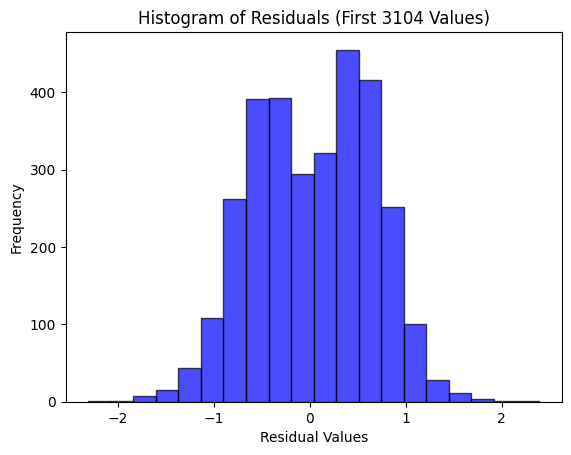

In [97]:
# Slice the DataFrame to select the first 3104 rows
subset_df = df.iloc[:3104]

# Calculate the residuals for the subset
subset_df['residuals'] = subset_df['Signal'] - y_pred[:3104]  # Use y_pred for the corresponding subset

# Create a histogram of the residuals for the subset
plt.hist(subset_df['residuals'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Residuals (First 3104 Values)')
plt.xlabel('Residual Values')
plt.ylabel('Frequency')
plt.show()

11) Scatter plot (Residual vs Covariate)

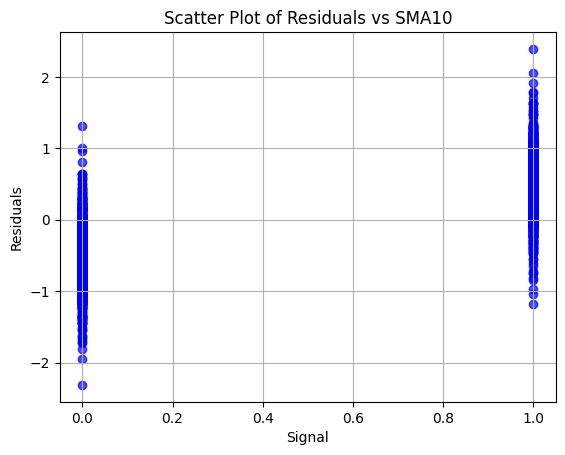

In [98]:
plt.scatter(subset_df['Signal'], subset_df['residuals'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Residuals vs SMA10')
plt.xlabel('Signal')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [113]:
y_pred = reg_model.predict(X_test)

In [114]:
binary_predictions = [1 if p >= 0.5 else 0 for p in y_pred]

In [116]:
import pickle
with open('Dep_1_Reg\lin_reg.pkl', 'wb') as file:
    pickle.dump(reg_model, file)